In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import SVC
import seaborn as sns

In [11]:
data=pd.read_csv('airbnb.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/18,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/19,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/19,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/18,0.10,1,0


In [12]:
data.drop(['id','name','host_id','latitude','longitude','neighbourhood',
           'latitude','longitude','number_of_reviews'], axis=1, inplace=True)
#examing the changes
data.head(5)

,host_name,neighbourhood_group,room_type,price,minimum_nights,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,John,Brooklyn,Private room,149,1,10/19/18,0.21,6,365
1,Jennifer,Manhattan,Entire home/apt,225,1,5/21/19,0.38,2,355
2,Elisabeth,Manhattan,Private room,150,3,NaN,NaN,1,365
3,LisaRoxanne,Brooklyn,Entire home/apt,89,1,7/5/19,4.64,1,194
4,Laura,Manhattan,Entire home/apt,80,10,11/19/18,0.10,1,0


In [13]:
data.drop(['last_review','reviews_per_month','host_name'], axis=1, inplace=True)

In [6]:
#Encode the input.
def Encode(data):
    for column in data.columns[data.columns.isin(['neighbourhood_group','room_type'])]:
        data[column]=data[column].factorize()[0]
    return data
data_en=Encode(data.copy())
data_en.head()

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,0,0,149,1,6,365
1,1,1,225,1,2,355
2,1,0,150,3,1,365
3,0,1,89,1,1,194
4,1,1,80,10,1,0


In [8]:
data_en=data_en[data_en.price<500]

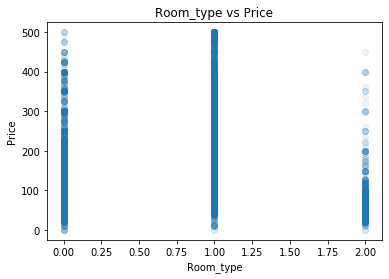

In [9]:
# Draw scatter plot
plt.scatter(data_en.room_type, data_en.price, alpha=0.08)
plt.xlabel('Room_type')
plt.ylabel('Price')
plt.title('Room_type vs Price')
plt.show()

Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

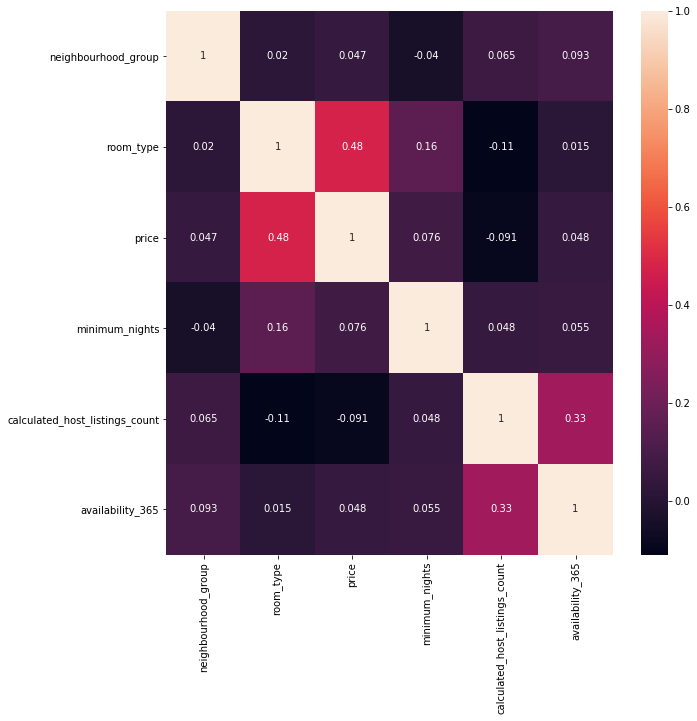

In [10]:
#Calculate the correlation index
corr=data_en.corr(method='kendall')
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
data.columns

#### The Kendall figure indicates that the price has strong correlation with 'room_type'.

In [9]:
#Import the necessary module
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [10]:
#Let' s start machine learning method by building the training and test datasets.
x=data_en.iloc[:,[0,1,3,4,5]]
y=data_en['price']
#getting test and training set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1, random_state=353)
print(x_train.head())
print(y_train.head())

       neighbourhood_group  room_type  minimum_nights  \
17736                    0          1               2   
24351                    1          0               5   
10069                    1          1               1   
11679                    1          0               2   
16315                    0          1               2   

       calculated_host_listings_count  availability_365  
17736                               1                 0  
24351                               1                 0  
10069                               1                 0  
11679                               1                 0  
16315                               2                 0  
17736    125
24351    101
10069    189
11679    145
16315    120
Name: price, dtype: int64


### Linear regression to predict price model

In [11]:
reg=LinearRegression()
reg.fit(x_train, y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.07480306392848757

#### r2 score between y_test and y_pred is 0.0748 based on linear Regression model.

In [12]:
#prepare a decision tree
from sklearn.tree import DecisionTreeRegressor
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.1, random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=0.0001)
DTree.fit(x_train, y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score 
r2_score(y_test, y_predict)

0.2534090076566696

#### Based on Decision Tree Regressor, r2 score between y_test and y_predict is 0.2534, which is higher than linear Regression model; it indicates that Decision Tree Regressor is a better fitting model.